In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc

In [2]:
#KNN algorithm
def euclidean_distance(point1, point2):
    point2 = np.array(point2)[0:2]
    return np.linalg.norm(point1 - point2)

def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for index, train_row in train.iterrows():
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = []
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction

def k_nearest_neighbors(train, test, num_neighbors):
    predictions = []
    for row in test:
        output = predict_classification(train, row, num_neighbors)
        predictions.append(output)
    return(predictions)

In [3]:
df = pd.read_csv('/content/emails.csv', sep=",")
# Dropping the 1st column because it contains index
df = df.drop(columns=df.columns[0])
# Creating the individual splits
fold1_train = df.iloc[:1000, :]
fold1_test = df.iloc[1000:, :]

fold2_train = df.iloc[1000:2000, :]
fold2_test = pd.concat([df.iloc[:1000, :], df.iloc[2000:, :]])

fold3_train = df.iloc[2000:3000, :]
fold3_test = fold2_test = pd.concat([df.iloc[:2000, :], df.iloc[3000:, :]])

fold4_train = df.iloc[3000:4000, :]
fold4_test = fold2_test = pd.concat([df.iloc[:3000, :], df.iloc[4000:, :]])

fold5_train = df.iloc[4000:5000, :]
fold5_test = df.iloc[:3000, :]

foldmain_train = df.iloc[:4000, :]
foldmain_test = df.iloc[4000:5000, :]

In [4]:
y_pred = np.array(k_nearest_neighbors(fold1_train.iloc[:, :-1], fold1_train.iloc[:, -1],1))
print("Accuracy fold1: " + str(accuracy_score(fold1_test.iloc[:, -1], y_pred)))
print("Precision fold1: " + str(precision_score(fold1_test.iloc[:, -1], y_pred, average='binary')))
print("Recall fold1: " + str(recall_score(fold1_test.iloc[:, -1], y_pred, average='binary')))

y_pred = np.array(k_nearest_neighbors(fold2_train.iloc[:, :-1], fold2_train.iloc[:, -1],1))
print("Accuracy fold2: " + str(accuracy_score(fold2_test.iloc[:, -1], y_pred)))
print("Precision fold2: " + str(precision_score(fold2_test.iloc[:, -1], y_pred, average='binary')))
print("Recall fold2: " + str(recall_score(fold2_test.iloc[:, -1], y_pred, average='binary')))

y_pred = np.array(k_nearest_neighbors(fold3_train.iloc[:, :-1], fold3_train.iloc[:, -1],1))
print("Accuracy fold3: " + str(accuracy_score(fold3_test.iloc[:, -1], y_pred)))
print("Precision fold3: " + str(precision_score(fold3_test.iloc[:, -1], y_pred, average='binary')))
print("Recall fold3: " + str(recall_score(fold3_test.iloc[:, -1], y_pred, average='binary')))

y_pred = np.array(k_nearest_neighbors(fold4_train.iloc[:, :-1], fold4_train.iloc[:, -1],1))
print("Accuracy fold4: " + str(accuracy_score(fold4_test.iloc[:, -1], y_pred)))
print("Precision fold4: " + str(precision_score(fold4_test.iloc[:, -1], y_pred, average='binary')))
print("Recall fold4: " + str(recall_score(fold4_test.iloc[:, -1], y_pred, average='binary')))

y_pred = np.array(k_nearest_neighbors(fold5_train.iloc[:, :-1], fold5_train.iloc[:, -1],1))
print("Accuracy fold5: " + str(accuracy_score(fold5_test.iloc[:, -1], y_pred)))
print("Precision fold5: " + str(precision_score(fold5_test.iloc[:, -1], y_pred, average='binary')))
print("Recall fold5: " + str(recall_score(fold5_test.iloc[:, -1], y_pred, average='binary')))

Accuracy fold1: 0.842
Precision fold1: 0.856140350877193
Recall fold1: 0.6759002770083102
Accuracy fold2: 0.853
Precision fold2: 0.7906137184115524
Recall fold2: 0.711038961038961
Accuracy fold3: 0.876
Precision fold3: 0.8274647887323944
Recall fold3: 0.7580645161290323
Accuracy fold4: 0.872
Precision fold4: 0.7677419354838709
Recall fold4: 0.7673611111111112
Accuracy fold5: 0.7373333333333333
Precision fold5: 0.5266544117647058
Recall fold5: 0.6773049645390071


In [ ]:
avrg_accuracy = []
for i in [1,3,5,7,10]:
    accuracies = []
    y_pred = np.array(k_nearest_neighbors(fold1_train.iloc[:, :-1], fold1_train.iloc[:, -1],i))
    accuracies.append(accuracy_score(fold1_test.iloc[:, -1], y_pred))

    y_pred = np.array(k_nearest_neighbors(fold2_train.iloc[:, :-1], fold2_train.iloc[:, -1],i))
    accuracies.append(accuracy_score(fold2_test.iloc[:, -1], y_pred))

    y_pred = np.array(k_nearest_neighbors(fold3_train.iloc[:, :-1], fold3_train.iloc[:, -1],i))
    accuracies.append(accuracy_score(fold3_test.iloc[:, -1], y_pred))

    y_pred = np.array(k_nearest_neighbors(fold4_train.iloc[:, :-1], fold4_train.iloc[:, -1],i))
    accuracies.append(accuracy_score(fold4_test.iloc[:, -1], y_pred))

    y_pred = np.array(k_nearest_neighbors(fold5_train.iloc[:, :-1], fold5_train.iloc[:, -1],i))
    accuracies.append(accuracy_score(fold5_test.iloc[:, -1], y_pred))

    avrg_accuracy.append(sum(accuracies)/5)

Text(0.5, 1.0, 'knn accuracy vs #of neighbors plot')

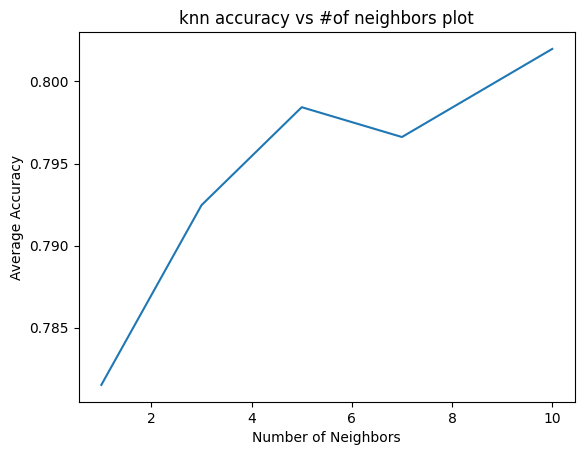

In [ ]:
#knn accuracy vs #of neighbors plot
plt.plot([1,3,5,7,10],avrg_accuracy)
plt.xlabel("Number of Neighbors")
plt.ylabel("Average Accuracy")
plt.title("knn accuracy vs #of neighbors plot")

In [ ]:
#log regression algo
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

def loss(y, y_hat):
    loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
    return loss

def gradients(X, y, y_hat):
    m = X.shape[0]
    #gradient with respect to weight and bias
    dw = (1/m)*np.dot(X.T, (y_hat - y))
    db = (1/m)*np.sum((y_hat - y))
    return dw, db

def train(X, y, bs, epochs, lr):
    X = np.array(X)
    y = np.array(y)
    m, n = X.shape

    # Initializing weights and bias to zeros.
    w = np.zeros((n,1))
    b = 0

    # Reshaping y.
    y = y.reshape(m,1)
    # Empty list to store losses.
    losses = []

    for epoch in range(epochs):
        for i in range((m-1)//bs + 1):

            # Defining batches. SGD.
            start_i = i*bs
            end_i = start_i + bs
            xb = X[start_i:end_i]
            yb = y[start_i:end_i]

            # Calculating hypothesis/prediction.
            y_hat = sigmoid(np.dot(xb, w) + b)

            # Getting the gradients of loss w.r.t parameters.
            dw, db = gradients(xb, yb, y_hat)

            # Updating the parameters.
            w -= lr*dw
            b -= lr*db

        # Calculating loss and appending it in the list.
        l = loss(y, sigmoid(np.dot(X, w) + b))
        losses.append(l)

    # returning weights, bias and losses(List).
    return w, b, losses

#prediction threshold = 0.5
def predict(X,w,b):
    preds = sigmoid(np.dot(X, w) + b)
    # Empty List to store predictions.
    pred_class = []
    pred_class = [1 if i > 0.5 else 0 for i in preds]
    return np.array(pred_class)

def accuracy(y, y_hat):
    accuracy = np.sum(y == y_hat) / len(y)
    return accuracy

In [ ]:
w1, b1, l = train(fold1_train.iloc[:, :-1], fold1_train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold1_test.iloc[:, :-1],w1,b1)
print("1fold Accuracy"+str(accuracy(np.array(fold1_test.iloc[:, -1]),predicted_c)))
print("1fold Precision " + str(precision_score(np.array(fold1_test.iloc[:, -1]),predicted_c, average='binary')))
print("1fold Recall " + str(recall_score(np.array(fold1_test.iloc[:, -1]),predicted_c, average='binary')))

w2, b2, l = train(fold1_train.iloc[:, :-1], fold2_train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold2_test.iloc[:, :-1],w2,b2)
print("2fold Accuracy"+str(accuracy(np.array(fold2_test.iloc[:, -1]),predicted_c)))
print("2fold Precision " + str(precision_score(np.array(fold2_test.iloc[:, -1]),predicted_c, average='binary')))
print("2fold Recall " + str(recall_score(np.array(fold2_test.iloc[:, -1]),predicted_c, average='binary')))

w3, b3, l = train(fold3_train.iloc[:, :-1], fold3_train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold3_test.iloc[:, :-1],w3,b3)
print("3fold Accuracy"+str(accuracy(np.array(fold3_test.iloc[:, -1]),predicted_c)))
print("3fold Precision " + str(precision_score(np.array(fold3_test.iloc[:, -1]),predicted_c, average='binary')))
print("3fold Recall " + str(recall_score(np.array(fold3_test.iloc[:, -1]),predicted_c, average='binary')))

w4, b4, l = train(fold4_train.iloc[:, :-1], fold4_train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold4_test.iloc[:, :-1],w4,b4)
print("4fold Accuracy"+str(accuracy(np.array(fold4_test.iloc[:, -1]),predicted_c)))
print("4fold Precision " + str(precision_score(np.array(fold4_test.iloc[:, -1]),predicted_c, average='binary')))
print("4fold Recall " + str(recall_score(np.array(fold4_test.iloc[:, -1]),predicted_c, average='binary')))

w5, b5, l = train(fold5_train.iloc[:, :-1], fold5_train.iloc[:,-1], bs=100, epochs=500, lr=0.02)
predicted_c = predict(fold5_test.iloc[:, :-1],w5,b5)
print("5fold Accuracy"+str(accuracy(np.array(fold5_test.iloc[:, -1]),predicted_c)))
print("5fold Precision " + str(precision_score(np.array(fold5_test.iloc[:, -1]),predicted_c, average='binary')))
print("5fold Recall " + str(recall_score(np.array(fold5_test.iloc[:, -1]),predicted_c, average='binary')))

<ipython-input-81-0cfde8dbbc00>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


1fold Accuracy0.906
1fold Precision 0.8380706287683032
1fold Recall 0.8380706287683032


<ipython-input-81-0cfde8dbbc00>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


2fold Accuracy0.7095
2fold Precision 0.2727272727272727
2fold Recall 0.005208333333333333


<ipython-input-81-0cfde8dbbc00>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


3fold Accuracy0.9125
3fold Precision 0.8171875
3fold Recall 0.9001721170395869


<ipython-input-81-0cfde8dbbc00>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


4fold Accuracy0.91575
4fold Precision 0.8491859468723222
4fold Recall 0.8602430555555556


<ipython-input-81-0cfde8dbbc00>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


5fold Accuracy0.9133333333333333
5fold Precision 0.8438967136150235
5fold Recall 0.8498817966903073


In [ ]:
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_pred = np.array(k_nearest_neighbors(fold1_train.iloc[:, :-1], fold1_train.iloc[:, -1],1))
fpr_knn, tpr_knn, threshold = roc_curve(foldmain_test.iloc[:, -1], y_pred)

w, b, l = train(foldmain_train.iloc[:, :-1], foldmain_train.iloc[:,-1], bs=100, epochs=1000, lr=0.02)
predicted_c = predict(foldmain_test.iloc[:, :-1],w,b)

fpr_log, tpr_log, threshold = roc_curve(foldmain_test.iloc[:, -1], predicted_c)

<ipython-input-81-0cfde8dbbc00>:3: RuntimeWarning: overflow encountered in exp
  return 1.0/(1 + np.exp(-z))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: divide by zero encountered in log
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))
<ipython-input-81-0cfde8dbbc00>:6: RuntimeWarning: invalid value encountered in multiply
  loss = -np.mean(y*(np.log(y_hat)) - (1-y)*np.log(1-y_hat))


<ipython-input-87-8c56116f8b17>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_knn, tpr_knn, 'b', color="purple",label="KNN")
<ipython-input-87-8c56116f8b17>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(fpr_log, tpr_log, 'b', color="black",label="LR")


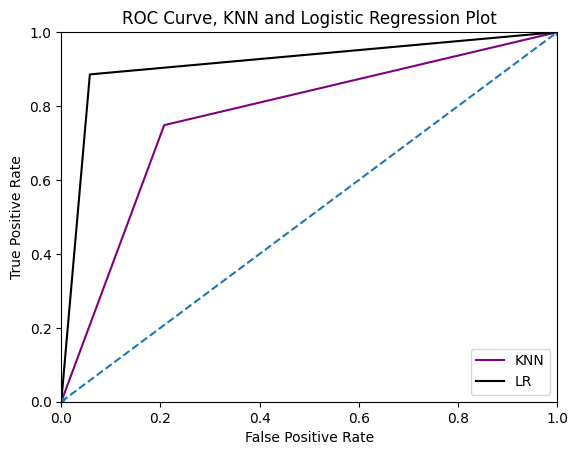

In [ ]:
plt.title('ROC Curve, KNN and Logistic Regression Plot')
plt.plot(fpr_knn, tpr_knn, 'b', color="purple",label="KNN")
plt.plot(fpr_log, tpr_log, 'b', color="black",label="LR")

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'v--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()